In [1]:
import numpy as np
import csv, sys
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata
from matplotlib.ticker import MaxNLocator

In [2]:
with open('input2.csv', 'rb') as csvfile:
    data = list(csv.reader(csvfile, delimiter=','))
csv_data = np.array(data, dtype=np.double)
values = csv_data[:,2]
features = csv_data[:,[0,1]]
n = features.shape[0]

In [3]:
stddev = np.std(features, axis=0)
stddev

array([ 1.89948154,  6.11745394])

In [4]:
stddev_tiles = np.tile(stddev, (features.shape[0],1))
stddev_tiles

array([[ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,  6.11745394],
       [ 1.89948154,

In [5]:
mean = np.mean(features, axis=0)
mean_tiles = np.tile(mean, (features.shape[0],1))
-mean_tiles

array([[ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
       [ -5.21050633, -18.3066043 ],
 

In [6]:
features = np.divide(np.add(features, -mean_tiles), stddev_tiles)
float_formatter = lambda x: "%.7f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
ones = np.ones((csv_data.shape[0],1), dtype=np.integer)
features = np.append(ones, features, axis=1)
features

array([[1.0000000, -1.6902014, -1.3234810],
       [1.0000000, -1.6691430, -0.8550084],
       [1.0000000, -1.6217617, -1.1213218],
       [1.0000000, -1.5796449, -0.6320872],
       [1.0000000, -1.5375281, -0.9334577],
       [1.0000000, -1.4901468, -1.2728668],
       [1.0000000, -1.4480300, -0.8845893],
       [1.0000000, -1.4059133, -1.0118073],
       [1.0000000, -1.3585319, -0.2526794],
       [1.0000000, -1.3164152, -1.1601664],
       [1.0000000, -1.2742984, -0.7874966],
       [1.0000000, -1.2269171, -1.0545015],
       [1.0000000, -1.1848003, -1.1055718],
       [1.0000000, -1.1426836, -0.8834369],
       [1.0000000, -1.0953022, -0.8616631],
       [1.0000000, -1.0531855, -1.0502056],
       [1.0000000, -1.0110687, -1.0314347],
       [1.0000000, -0.9636873, -1.0587402],
       [1.0000000, -0.9215706, -0.9162348],
       [1.0000000, -0.8794538, 0.2093805],
       [1.0000000, -0.8320725, -0.3017063],
       [1.0000000, -0.7899557, -0.5066478],
       [1.0000000, -0.7478390, -0

In [7]:
beta = np.zeros((1, features.shape[1]))
beta

array([[0.0000000, 0.0000000, 0.0000000]])

In [8]:
features.T.shape

(3, 79)

In [9]:
R = 0.5 * np.sum(np.square(np.sum(beta * features, axis=1) - values)) / csv_data.shape[0]
features.shape

(79, 3)

In [15]:
alpha_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
#alpha_values = [0.001]
r_value = []

iterations = 100
for alpha in alpha_values:
    rval = []
    #print alpha
    for i in range(1, iterations+1):
        beta = beta - alpha / n * np.sum((features.T) * (np.sum(beta * features, axis=1) - values), axis=1)
        rval.append(0.5 * np.sum(np.square(np.sum(beta * features, axis=1) - values)) / csv_data.shape[0])
    r_value.append(rval)
    print alpha,"->",beta
    beta = np.zeros((1, features.shape[1]))

0.001 -> [[0.1043917 0.0120282 0.0086781]]
0.005 -> [[0.4322573 0.0457332 0.0298341]]
0.01 -> [[0.6951207 0.0686086 0.0387800]]
0.05 -> [[1.0899692 0.1120069 0.0179978]]
0.1 -> [[1.0964317 0.1243621 0.0056576]]
0.5 -> [[1.0964608 0.1286172 0.0014025]]
1 -> [[0.0000000 0.0000000 0.0000000]]
5 -> [[0.0000000 0.0000000 0.0000000]]
10 -> [[0.0000000 0.0000000 0.0000000]]


In [16]:
r_value

[[0.61065406684994505,
  0.60942898748109975,
  0.60820639322102898,
  0.60698627897424251,
  0.60576863965587879,
  0.60455347019168426,
  0.60334076551798921,
  0.60213052058168481,
  0.60092273034020205,
  0.59971738976148725,
  0.59851449382398136,
  0.59731403751659562,
  0.59611601583869067,
  0.59492042380005306,
  0.59372725642087465,
  0.59253650873172725,
  0.5913481757735437,
  0.5901622525975937,
  0.5889787342654621,
  0.58779761584902723,
  0.58661889243043797,
  0.58544255910209297,
  0.58426861096661797,
  0.58309704313684374,
  0.5819278507357849,
  0.58076102889661718,
  0.57959657276265708,
  0.57843447748733845,
  0.57727473823419218,
  0.57611735017682475,
  0.57496230849889463,
  0.57380960839409345,
  0.5726592450661232,
  0.57151121372867464,
  0.57036550960540644,
  0.56922212792992344,
  0.56808106394575586,
  0.56694231290633779,
  0.56580587007498617,
  0.56467173072487975,
  0.5635398901390376,
  0.56241034361029796,
  0.56128308644129843,
  0.5601581139444

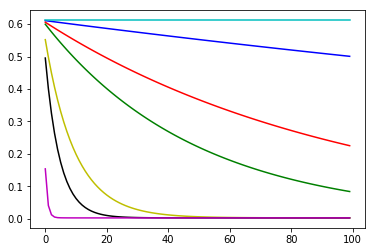

In [39]:
series = list(range(100))
plt.plot(series, r_value[0],'b-',label='0.001')
plt.plot(series, r_value[1],'r-',label='0.005')
plt.plot(series, r_value[2],'g-',label='0.01')
plt.plot(series, r_value[3],'y-',label='0.05')
plt.plot(series, r_value[4],'k-',label='0.1')
plt.plot(series, r_value[5],'m-',label='0.5')
plt.plot(series, r_value[6],'c-',label='1')